<a href="https://colab.research.google.com/github/dominikamolnar/AI2025/blob/main/Badge_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
df = pd.read_csv("Business_Management_Dataset.csv")

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Business_Management_Dataset.csv")

# Display the first few rows
print("Initial Dataset:")
print(df.head())

# --- 1. Check for missing values ---
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Fill missing values
for col in df.columns:
    if df[col].dtype == "object":  # Categorical columns
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # Numerical columns
        df[col].fillna(df[col].median(), inplace=True)

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# --- 2. Remove duplicates ---
df = df.drop_duplicates()

# --- 3. Convert data types ---
for col in df.columns:
    # Convert date columns
    if "date" in col.lower() or "time" in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')
    # Convert numeric columns stored as strings
    elif df[col].dtype == "object":
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass  # Ignore conversion errors for non-numeric text columns

# --- 4. Handle outliers using the IQR method ---
for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# --- 5. Save the cleaned dataset ---
df.to_csv("Cleaned_Business_Management_Dataset.csv", index=False)

print("\nDataset cleaned and saved as 'Cleaned_Business_Management_Dataset.csv'.")


Initial Dataset:
   Employee_Satisfaction  Employee_Turnover  Training_Hours  Productivity  \
0                   8.53               1.66           59.72         53.75   
1                   8.38              12.70           37.63         78.74   
2                   2.03              27.22           45.53         96.58   
3                   2.32              11.89           35.75        102.44   
4                   6.41              23.06           11.12         47.51   

   Annual_Sales  Market_Share  Department  Region Company_Type  \
0     574996.25         36.32     Finance    Asia  Corporation   
1     190461.36         27.66     Finance  Europe  Corporation   
2     497310.10         37.07          HR    Asia  Corporation   
3     536186.74         20.56          HR  Africa          SME   
4     432654.80          9.18  Operations  Africa          SME   

   Leadership_Style  
0  Transformational  
1     Transactional  
2     Laissez-faire  
3     Laissez-faire  
4        Auto

<ipython-input-6-24b57d8d7784>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-6-24b57d8d7784>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 


Dataset cleaned and saved as 'Cleaned_Business_Management_Dataset.csv'.


In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Business_Management_Dataset.csv")

# --- 1. General Information ---
print("Dataset Information:")
print(df.info())

# --- 2. Summary Statistics for Numerical Columns ---
print("\nNumerical Column Statistics:")
print(df.describe())

# --- 3. Summary Statistics for Categorical Columns ---
print("\nCategorical Column Statistics:")
print(df.describe(include=['object']))

# --- 4. Unique Values in Each Column ---
print("\nUnique Values Per Column:")
print(df.nunique())

# --- 5. Mode (Most Common Value) for Each Column ---
print("\nMost Common Values (Mode):")
print(df.mode().iloc[0])



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_Satisfaction  20000 non-null  float64
 1   Employee_Turnover      20000 non-null  float64
 2   Training_Hours         20000 non-null  float64
 3   Productivity           20000 non-null  float64
 4   Annual_Sales           20000 non-null  float64
 5   Market_Share           20000 non-null  float64
 6   Department             20000 non-null  object 
 7   Region                 20000 non-null  object 
 8   Company_Type           20000 non-null  object 
 9   Leadership_Style       20000 non-null  object 
dtypes: float64(6), object(4)
memory usage: 1.5+ MB
None

Numerical Column Statistics:
       Employee_Satisfaction  Employee_Turnover  Training_Hours  Productivity  \
count           20000.000000       20000.000000    20000.000000  20000.000000 

<ipython-input-45-58108a1c7816>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Leadership_Style", y="Employee_Satisfaction", data=avg_satisfaction, palette="coolwarm")


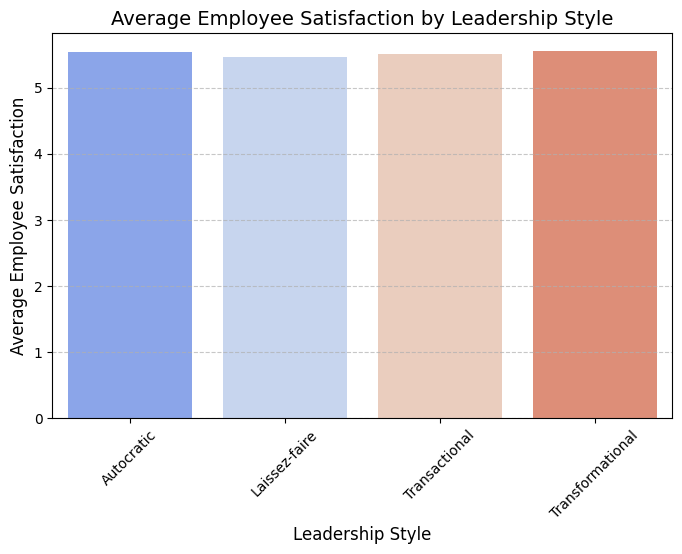

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Cleaned_Business_Management_Dataset.csv")

# Group by leadership style and calculate average employee satisfaction
avg_satisfaction = df.groupby("Leadership_Style")["Employee_Satisfaction"].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x="Leadership_Style", y="Employee_Satisfaction", data=avg_satisfaction, palette="coolwarm")

# Customize plot
plt.xlabel("Leadership Style", fontsize=12)
plt.ylabel("Average Employee Satisfaction", fontsize=12)
plt.title("Average Employee Satisfaction by Leadership Style", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


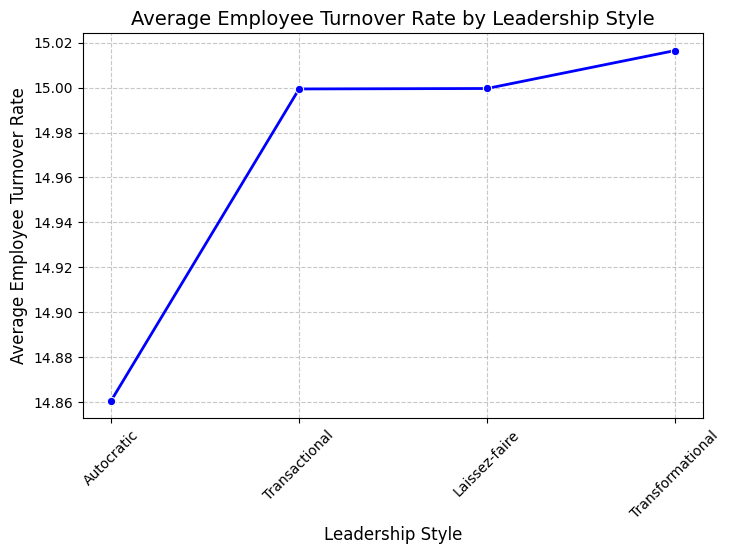

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Cleaned_Business_Management_Dataset.csv")

# Group by leadership style and calculate average turnover rate
avg_turnover = df.groupby("Leadership_Style")["Employee_Turnover"].mean().reset_index()

# Sort data by turnover rate for better visualization
avg_turnover = avg_turnover.sort_values(by="Employee_Turnover")

# Line plot
plt.figure(figsize=(8, 5))
sns.lineplot(x="Leadership_Style", y="Employee_Turnover", data=avg_turnover, marker="o", color="blue", linewidth=2)

# Customize plot
plt.xlabel("Leadership Style", fontsize=12)
plt.ylabel("Average Employee Turnover Rate", fontsize=12)
plt.title("Average Employee Turnover Rate by Leadership Style", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.show()


<ipython-input-47-fc3ca9bd4cb6>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  turnover_distribution = df.groupby("Satisfaction_Level")["Employee_Turnover"].sum()


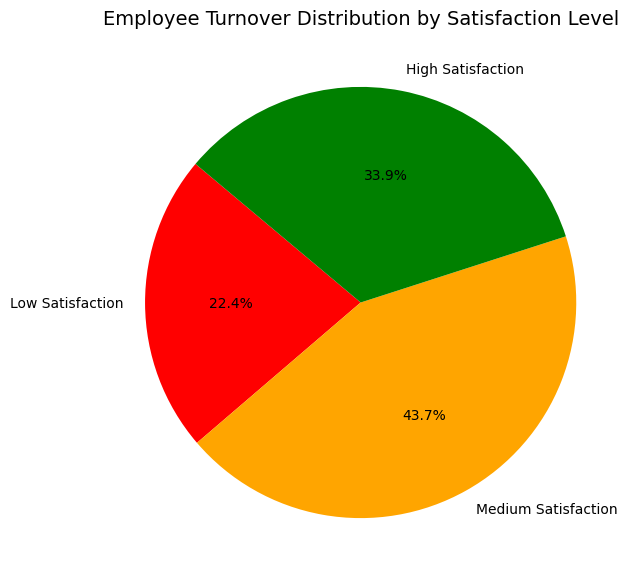

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Cleaned_Business_Management_Dataset.csv")

# Categorize employee satisfaction into low, medium, and high
bins = [0, 3, 7, 10]  # Example satisfaction levels (adjust based on data)
labels = ["Low Satisfaction", "Medium Satisfaction", "High Satisfaction"]
df["Satisfaction_Level"] = pd.cut(df["Employee_Satisfaction"], bins=bins, labels=labels, include_lowest=True)

# Calculate total turnover by satisfaction level
turnover_distribution = df.groupby("Satisfaction_Level")["Employee_Turnover"].sum()

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(turnover_distribution, labels=turnover_distribution.index, autopct="%1.1f%%", colors=["red", "orange", "green"], startangle=140)

# Customize plot
plt.title("Employee Turnover Distribution by Satisfaction Level", fontsize=14)

# Show plot
plt.show()

